# K-Nearest Neighbors

* # [Part I - Description](#part1)

* # [Part II - Algorithm](#part2)
    1. [Choosing the right K](#part2)
    2. [Distance Calculation](#part2)
    3. [Find the nearest neighbors](#part2)
    4. [Classify the points](#part2)
* # [Part III - Implementation](#part3)


***
## Part I - Description  <a name="part1"></a>

k-Nearest Neighbors (KNN) is a supervised machine learning algorithm that can be used for either Regression or Classification tasks. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
<br>
KNN is non-parametric, algorithm which means that the algorithm does not make assumptions about the underlying distributions of the data. Therefore KNN is a good choice when there is no prior knowledge about the data distribution.
<br>

KNN is nicknamed "lazy algorithm" : what is mean ,What this means is that there is no explicit training phase or it is very minimal.
<br>
KNN Algorithm is based on feature similarity:How closely out-of-sample features resemble our training set determines how we classify a given data point .
<br>
The algorithm can be use for:

- Classification: a datapoint is classify by a majority vote of its neighbors, it will be assign to the most commom class mong it k nearest neighbors
- Regression : for prediction of has a real number (a number with a decimal point)


***
## Part II - Algorithm  <a name="part1"></a>


The K-NN algorithm can be summarized as follows:

### 1. Choosing the right K



To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that give best accuracy .
Here are some things to keep in mind:
As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.
Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.
In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

<p>https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761</p>


### 2. Distance Calculation :

Calculate the distances between the new input and all the training data. <br>

The distance between points is determined by using one of several versions of the Minkowski distance equation. The generalized formula for Minkowski distance can be represented as follows:

$$ D(X, Y)=(\sum_{i=1}^{n} \left\lvert{x_{(i)}-y_{(i)}}\right\rvert)^{1/p}$$

where X and Y are data points, n is the number of dimensions, and p is the Minkowski power parameter. When p =1, the distance is known at the Manhattan distance, and when p=2 the distance is known as the Euclidean distance. 

### 3.Find the nearest neighbors


Based on these pairwise distances find the nearest distance of new datapoint. Nearest neighbors are k points with the lowest computed distances


### 4.Classify the points
Classify the point based on a majority vote.


***
## Part III - Implementation  <a name="part3"></a>
 

#### Step by step
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data <br>
  - Calculate the distance between the query example and the current example from the data.
  - Sort and Pick the first K entries from the sorted 
  - Get the labels of the selected K entries
  - If regression, return the mean of the K labels
  - If classification, return the mode of the K labels using label voting

<br>

 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#### Load Data

For the implementation example of the KNN, we use the Iris dataset.


- Dataset

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).
we are going to use the iris data set from sklearn.datasets

In [3]:

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


separate the data into features (X) and the target variable (y) and split the dataset

In [4]:
X = df.drop('target', axis=1)
y = df.target

In [5]:
# Split the data - 75% train, 25% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)
# Scale the X data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Initialize K to your chosen number of neighbors

In [6]:
k=5

### Function to Calculate the distance

In [7]:
# Calculate distance between two points

def minkowski_distance(x1, x2, p=1):
    '''
    p=1 : data are 1D datapoint
    '''
    # Store the number of dimensions
    dim = len(x1)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(x1[d] - x2[d])**p
        
    distance = distance**(1/p)
    
    return distance

#### Function for making prediction 

In [8]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test

In [9]:
# Make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=4, p=1)
print( 'the KNN Classifier achieve %f of accuracy with k=%d'%(accuracy_score(y_test, y_hat_test),k))

the KNN Classifier achieve 0.973684 of accuracy with k=5


### Choosing the right K

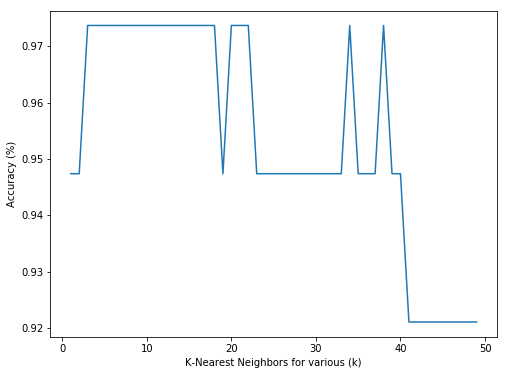

In [10]:
accuracies = []

for k in range(1,50):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    accuracies.append(accuracy_score(y_test, y_hat_test))

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,50), accuracies)
ax.set_xlabel('K-Nearest Neighbors for various (k)')
ax.set_ylabel('Accuracy (%)');

### Conclusion:

The KNN Classifier performed quite well with the initial value of k=5.
In the graph, we can see while using nearly any k value less than 20 results in  good classification accuracy (>95%) classification accuracy on the test set.